In [164]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [165]:
def read_file(filename):
    img=cv2.imread(filename)
    if img is None:
        raise FileNotFoundError("not found")
    filename=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=np.copy(filename)
    plt.imshow(filename)
    plt.axis('off')
    plt.show()
    return img


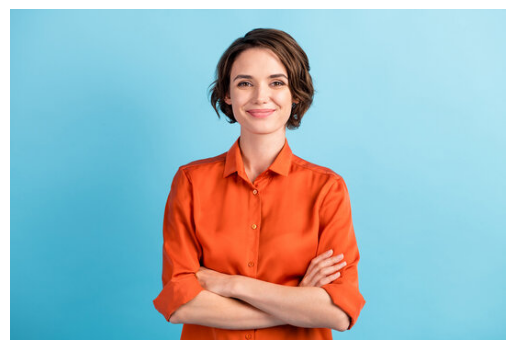

In [166]:
filename="image.jpg"
img=read_file(filename)
org_image=np.copy(img)

In [167]:
def edge_mask(img,line_size,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
    return edges

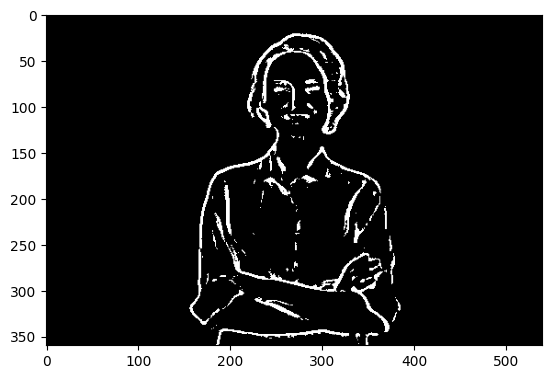

In [168]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

In [169]:
def color_quantization(img,k):
    data=np.float32(img).reshape((-1,3))
    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

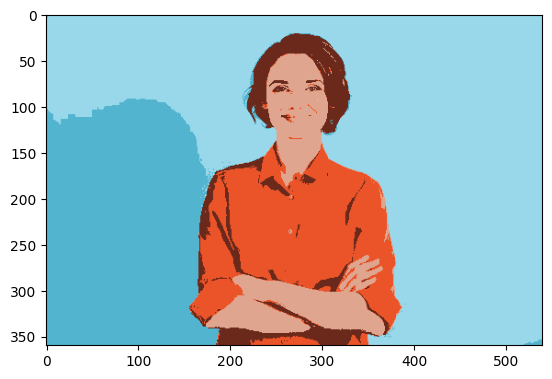

In [170]:
img=color_quantization(img,k=5)
plt.imshow(img)
plt.show()

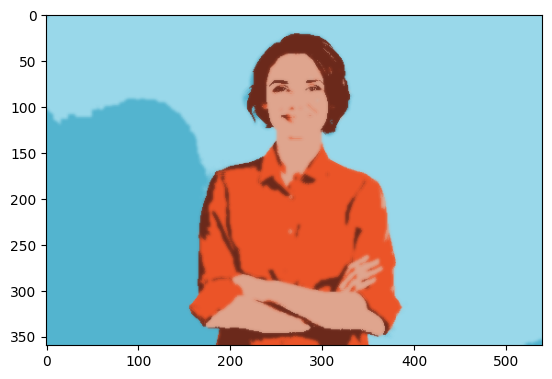

In [171]:
blurred=cv2.bilateralFilter(img,d=6,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [172]:
def cartoon(blurred):
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(c)
    plt.title("CARTOONIFIED IMAGE")
    plt.show()
    plt.imshow(org_image)
    plt.title("ORIGINAL IMAGE")
    plt.show()

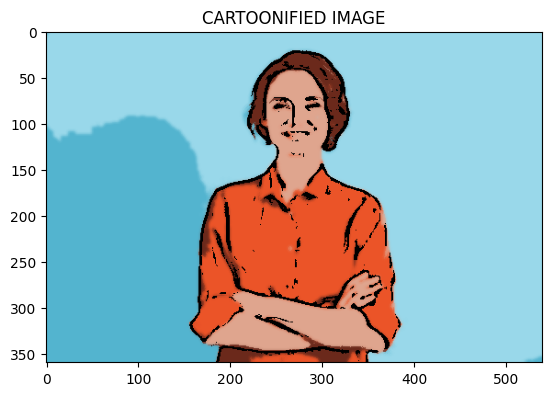

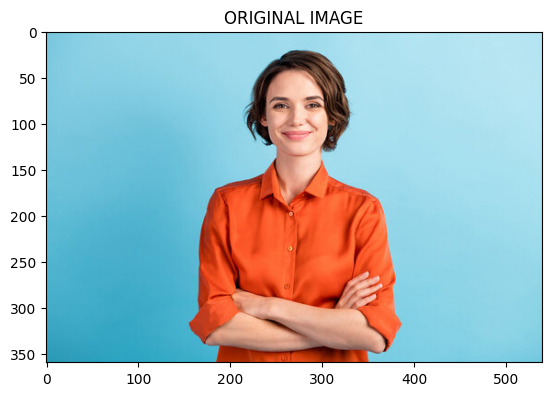

In [173]:
cartoon(blurred)